### Задание 1
Вернемся к [набору данных о видеоиграх](https://github.com/obulygin/pyda_homeworks/blob/master/stat_case_study/vgsales.csv).

Ответьте на следующие вопросы:

1. Как критики относятся к спортивным играм?
2. Критикам нравятся больше игры на PC или на PS4?
3. Критикам больше нравятся стрелялки или стратегии?

Для каждого вопроса:
* сформулируйте нулевую и альтернативную гипотезы;
* выберите пороговый уровень статистической значимости;
* опишите полученные результаты статистического теста.



In [1]:
import lzma
import pandas as pd

file = lzma.open('data/vgsales.csv.xz')
sales = pd.read_csv(file)

### Как критики относятся к спортивным играм?

Предположим такую интерпретацию оценок. 

| Диапазон | Категория | Пояснение |
| :------: | :-------: | :-------: |
| 0 < score <= 25 | ужасно | не надо тратить время |
| 25 < score <= 50 | плохо | только для фанатиков |
| 50 < score <= 75 | хорошо | можно поиграть |
| 75 < score <= 100 | отлично | надо поиграть |


Гипотезы:
* H0: средняя оценка критиков спортивным играм <= 75
* H1: средняя оценка критиков спортивным играм более 75

Пороговый уровень статистической значимости примем 5%

In [2]:
only_sports = sales['Genre'] == 'Sports'
sports_vs_critic_score = sales[only_sports][['Genre', 'Critic_Score']].dropna()

#### Изучение данных / характер распределения / визуализация

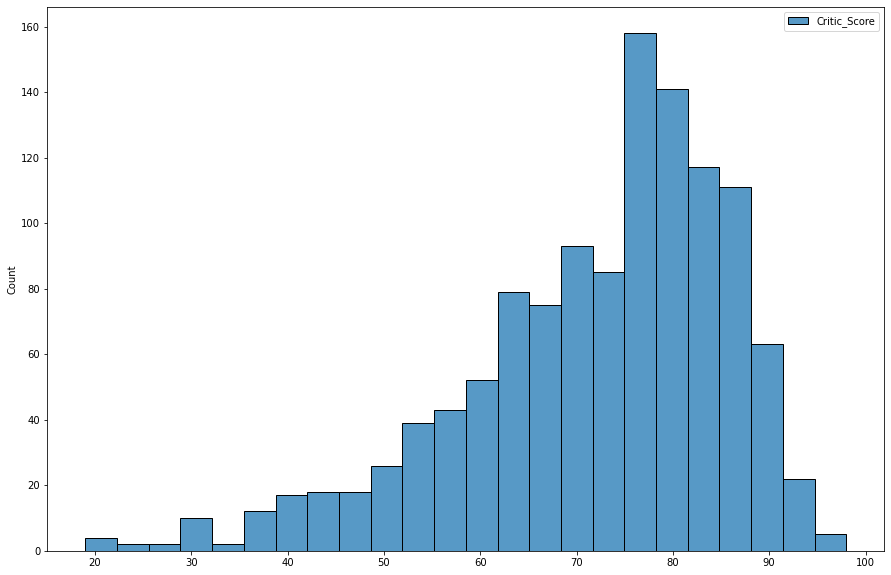

In [3]:
import seaborn as sns
from pylab import rcParams

rcParams['figure.figsize'] = 15,10
ax = sns.histplot(sports_vs_critic_score)

#### Изучение данных / характер распределения / тест на нормальность
Источник - https://www.machinelearningmastery.ru/statistical-hypothesis-tests-in-python-cheat-sheet/

In [4]:
from scipy.stats import normaltest

stats, p = normaltest(sports_vs_critic_score['Critic_Score'])

print(stats, p)
if p < 0.05:
    print("Отвергаем H0. Данные не имеют гауссово распределение")
else:
    print("Не отвергаем H0. Данные имеют гауссово распределение")

151.25075517450526 1.4332297751857863e-33
Отвергаем H0. Данные не имеют гауссово распределение


#### Изучение данных / характер распределения / выводы
Оценки критиков не соответствует нормальному распределению.

Исходя из [схемы](http://lit-review.ru/wp-content/uploads/2018/04/vibor_stat_kriteria-1024x774.png) и наших данных и условий задачи выбираем **Критерий Вилкоксона**

In [5]:
from scipy.stats import wilcoxon

wilcoxon(sports_vs_critic_score['Critic_Score'], alternative='greater')

WilcoxonResult(statistic=713415.0, pvalue=3.574976351667195e-197)

С критерием Вилкоксона не очень получилось :(   
Не понятно как его использовать для сравнения со значением.

Возьмем `ttest_1samp`...

In [6]:
from scipy.stats import ttest_1samp

stats, p = ttest_1samp(sports_vs_critic_score['Critic_Score'], 75, alternative='greater')
print(stats, p)
if p < 0.05:
    print("Отвергаем H0. Критики оценили спортивные игры выше 75")
else:
    print("Не отвергаем H0. Критики оценили спортивные игры ниже 75")

-7.5485926388546725 0.9999999999999565
Не отвергаем H0. Критики оценили спортивные игры ниже 75
